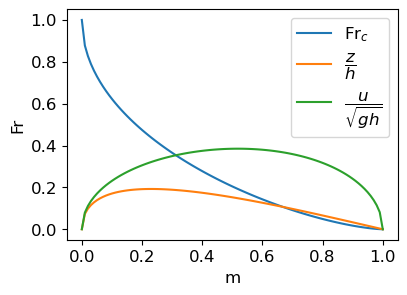

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import json
from config import large_figure_width, standard_figure_width

g = 9.81

W = 54
w = 54
T = 3
B = 5.7
h = 4.5
Ac = h*W
Ab = B*T
Hm = Ac/W
m = Ab/Ac
p = (W-w)/2/h

m_values = np.linspace(0, 1, 100)



F_values = []
for m in m_values :
    a = 1/2.
    b = 1-m
    c = -3/2.
    solutions = np.roots([a, 0, b, c])
    F = solutions[solutions > 0]
    F_values += [F]


# Fc = np.sqrt( ( 2*z*(1-z-m)**2 )/( 1-(1-z-m)**2 ) )

Fs = ( 2*np.sin(np.arcsin(1-m_values)/3) )**1.5
z = 1/2*( Fs**(2/3) - Fs**2 )
u = Fs**(1/3) - Fs

standard_figure_height = 0.7 * standard_figure_width
fig_size = (standard_figure_width, standard_figure_height)

plt.figure(figsize=fig_size)

plt.plot( m_values, Fs, label = r'Fr$_c$' )

plt.plot( m_values, z, label = r'$\dfrac{z}{h}$' )

plt.plot( m_values, u, label = r"$\dfrac{u}{\sqrt{gh}}$" )
plt.xlabel( r'm' )
plt.ylabel( r'Fr' )


plt.legend()
plt.savefig('../Figures/Schjif.pdf', bbox_inches = 'tight')
plt.show()

## Résolution de la cubique de Kreitner

In [97]:


import cmath
import math


def calculate_z(p, q):
    # Ensure that p is negative for the square root to be valid
    if p >= 0:
        raise ValueError("Input p must be negative")

    # Calculate the common term
    common_term = (3 * q) / (2 * p) * math.sqrt(3 / -p)
    
    # Ensure the input to arccos is within the range [-1, 1]
    if common_term < -1 or common_term > 1:
        raise ValueError("Input to arccos out of range. Check the values of p and q.")

    arccos_val = math.acos(common_term)
    sqrt_term = 2 * math.sqrt(-p / 3)
    
    z = []
    for k in (-1, 0, 1):
        zk = sqrt_term * math.cos((arccos_val / 3) + (2 * k * math.pi / 3))
        z.append(zk)
    
    return z


# Example usage

m = 0.1
F = 0.0000001

delta = -(4*(27*F**2 - (F**2 - 2*m + 2)**3)/F**6)

print(delta)

p = -(1 + 2*(1-m)/F**2)
q = 2/F**2
roots = calculate_z(p, q)
print("The roots are:")
for i, root in enumerate(roots):
    print(f"x{i+1} = {root}")


2.3327999999999315e+43
The roots are:
x1 = 1.1111111143025445
x2 = 13416407.309443185
x3 = -13416408.420554293


## Courant de retour critique en fonction de Fr

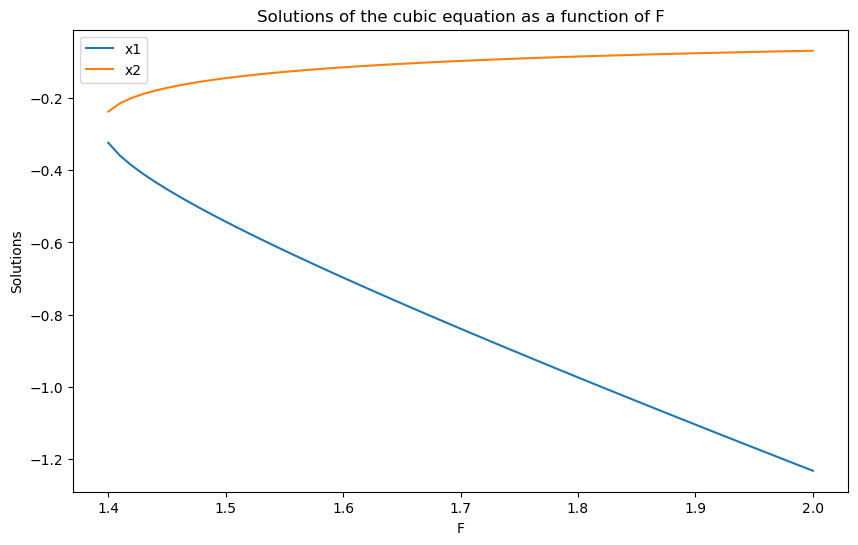

In [88]:
import math
import numpy as np
import matplotlib.pyplot as plt

def calculate_z(p, q):
    # Ensure that p is negative for the square root to be valid
    if p >= 0:
        raise ValueError("Input p must be negative")

    # Calculate the common term
    common_term = (3 * q) / (2 * p) * math.sqrt(3 / -p)
    
    # Ensure the input to arccos is within the range [-1, 1]
    if common_term < -1 or common_term > 1:
        raise ValueError("Input to arccos out of range. Check the values of p and q.")

    arccos_val = math.acos(common_term)
    sqrt_term = 2 * math.sqrt(-p / 3)
    
    z = []
    for k in (-1, 0, 1):
        zk = sqrt_term * math.cos((arccos_val / 3) + (2 * k * math.pi / 3))
        z.append(zk)
    
    return z

# Initialize variables
m = 0.1
F_values = np.linspace(1.01, 2, 100)  # Using 0.01 to avoid division by zero

# Lists to store solutions
roots_x1 = []
roots_x2 = []
roots_x3 = []

for F in F_values:
    try:
        p = -(1 + 2*(1-m)/F**2)
        q = 2/F**2
        roots = calculate_z(p, q)
        roots_x1.append(F*(roots[0]-1))
        roots_x2.append(F*(roots[1]-1))
        roots_x3.append(F*(roots[2]-1))
    except ValueError as e:
        # Handle cases where calculation is not possible
        roots_x1.append(float('nan'))
        roots_x2.append(float('nan'))
        roots_x3.append(float('nan'))

# Plotting the solutions
plt.figure(figsize=(10, 6))
plt.plot(F_values, roots_x1, label="x1", )
plt.plot(F_values, roots_x2, label="x2", )
plt.xlabel('F')
plt.ylabel('Solutions')
plt.title('Solutions of the cubic equation as a function of F')
# plt.ylim(0, 1)
plt.legend()

plt.show()


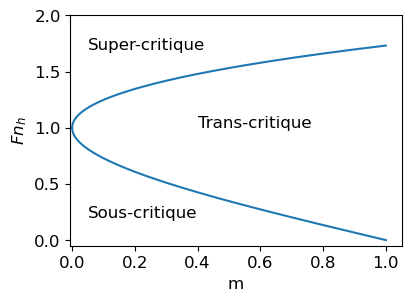

In [105]:
import cmath
import math
import numpy as np
import matplotlib.pyplot as plt
from config import large_figure_width, standard_figure_width



def calculate_z(p, q):
    # Ensure that p is negative for the square root to be valid
    if p >= 0:
        raise ValueError("Input p must be negative")

    # Calculate the common term
    common_term = (3 * q) / (2 * p) * math.sqrt(3 / -p)
    
    # Ensure the input to arccos is within the range [-1, 1]
    if common_term < -1 or common_term > 1:
        raise ValueError("Input to arccos out of range. Check the values of p and q.")

    arccos_val = math.acos(common_term)
    sqrt_term = 2 * math.sqrt(-p / 3)
    
    z = []
    for k in (-1, 0, 1):
        zk = sqrt_term * math.cos((arccos_val / 3) + (2 * k * math.pi / 3))
        z.append(zk)
    
    return z


delta = -(4*(27*F**2 - (F**2 - 2*m + 2)**3)/F**6)

m_values = np.linspace(0., 1, 400)  # Adjust the range and resolution as needed

# Initialize lists to store the results
m_results = []
sub_roots = []
sup_roots = []
# Iterate over the range of m values
for m in m_values:
    p = -3
    q = 2 * (1 - m)
    
    try:
        roots = calculate_z(p, q)
        positiv_roots = [x for x in roots if x >= 0]
        if positiv_roots:  # Ensure there are positive roots to plot
            m_results.append(m)
            sub_roots.append(positiv_roots[0])
            sup_roots.append(positiv_roots[1])
    except ValueError as e:
        continue

# Flatten the results for plotting
# flattened_roots = [root for sublist in roots_results for root in sublist]
# flattened_m = [m for m, roots in zip(m_results, roots_results) for _ in roots]

# Plot the results
standard_figure_height = 0.7 * standard_figure_width
fig_size = (standard_figure_width, standard_figure_height)
plt.figure(figsize=fig_size)



plt.plot(m_values, sub_roots, color = 'tab:blue')
plt.plot(m_values, sup_roots, color = 'tab:blue')
plt.xlabel('m')
plt.ylabel(r'$Fn_h$')
plt.text(x = 0.05, y =0.2 , s = 'Sous-critique')
plt.text(x = 0.4, y = 1 , s = 'Trans-critique')
plt.text(x = 0.05, y = 1.7 , s = 'Super-critique')
plt.ylim(-0.05,2)
plt.xlim(-0.005, 1.05)
plt.savefig('../Figures/limite_Schjif.pdf', bbox_inches = 'tight')

plt.show()


